In [19]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [33]:
# Load Incineration Data
df = pd.read_csv('./data/폐기물처리시설_소각.csv', encoding='cp949').T
df_numbers = df[df[0] == "시설수 (개소)"][3].astype('int64')
df_amount = df[df[0] == '처리량 (톤)'][3].astype('int64')
df_time = df[df[0] == '1일평균가동시간 (시간)'][3].astype('int64')
df_ton_day = df[df[0] == '시설용량 (톤/일)'][3].astype('int64')

list_time = df_time.to_list()
list_ton = df_ton_day.to_list()
list_amount = df_amount.to_list()
list_numbers = df_numbers.to_list()

In [34]:
# New DataFrame
pd.options.display.float_format = '{:.2f}'.format
df_burn = pd.DataFrame({"연도" : range(2011,2021),
                        "시설수 (개소)" : list_numbers,
                        "1일평균가동시간 (시간)" : list_time,
                        '시설용량 (톤/일)' : list_ton,
                        '처리량' : list_amount})

df_burn["1년 최대 처리량"] = round(df_burn['시설수 (개소)'] * (df_burn['1일평균가동시간 (시간)'] / 24) * df_burn['시설용량 (톤/일)'] * 365, 1)
df_burn['실질 처리 정도'] = round(df_burn['처리량'] / df_burn['1년 최대 처리량'] * 100, 2)
df_burn['실질 처리 정도'] = df_burn['실질 처리 정도'].apply(lambda x: str(x) + "%")

df_burn

,연도,시설수 (개소),1일평균가동시간 (시간),시설용량 (톤/일),처리량,1년 최대 처리량,실질 처리 정도
0,2011,173,20,16317,3963740,858614137.50,0.46%
1,2012,184,20,17207,4337568,963018433.30,0.45%
2,2013,182,20,16739,4199896,926643141.70,0.45%
3,2014,184,21,16769,4394962,985430285.00,0.45%
4,2015,186,21,17238,4582405,1024001842.50,0.45%
5,2016,184,21,17581,4652412,1033147465.00,0.45%
6,2017,178,21,16994,4567026,966087657.50,0.47%
7,2018,178,21,17124,4563156,973477995.00,0.47%
8,2019,180,21,18609,4599617,1069784887.50,0.43%
9,2020,185,19,19531,5081258,1044074363.50,0.49%


In [35]:
# Data Slicing 
def dd_1418(df, year):
    df = df[df['구분'] == '전국']
    df = df.reset_index(drop=True)
    df = df[df['Unnamed: 3'] == '소각']
    df = df.rename(columns={'총계' : year})
    df = df.iloc[:,[4]]
    return df

def dd_1920(df, year):
    df = df[df['시도'] == '전국']
    df = df.iloc[[0], [6]]
    df = df.astype('float64')
    df = df.rename(columns={'Unnamed: 6' : year})
    df.index = [2]
    return df.round(1)

# Load Data
df_2014 = dd_1418(pd.read_csv('./data/trash_2014.csv'), 2014)
df_2015 = dd_1418(pd.read_csv('./data/trash_2015.csv'), 2015)
df_2016 = dd_1418(pd.read_csv('./data/trash_2016.csv'), 2016)
df_2017 = dd_1418(pd.read_csv('./data/trash_2017.csv'), 2017)
df_2018 = dd_1418(pd.read_csv('./data/trash_2018.csv'), 2018)
df_2019 = dd_1920(pd.read_csv("./data/trash_2019.csv"), 2019)
df_2020 = dd_1920(pd.read_csv("./data/trash_2020.csv"), 2020)

# Data Concatenation
df_sum = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020], axis=1).fillna(0)
df_sum = df_sum.T.reset_index().rename(columns={2 : '소각량'})
df_sum.iloc[:5,1] = df_sum.iloc[:5,1].apply(lambda x: x*365)
df_sum

,index,소각량
0,2014,4208669.00
1,2015,4407338.50
2,2016,4521985.00
3,2017,4386095.50
4,2018,4536694.50
5,2019,4781894.70
6,2020,5058818.70


/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_1112/1488984681.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


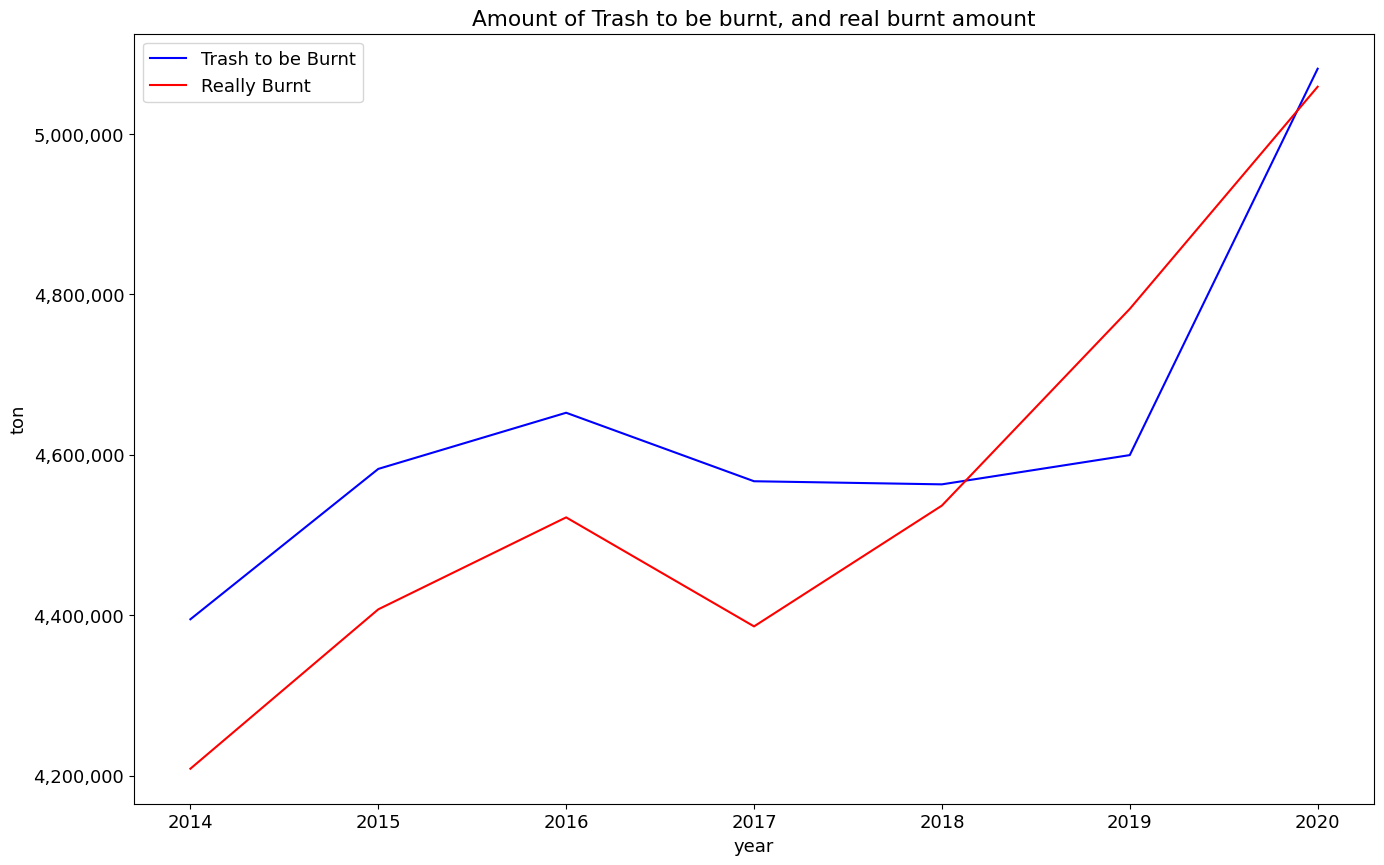

In [44]:
# Trash amount and Burn amount
df_together = pd.concat([df_sum[['소각량']], df_burn.iloc[3:,4].reset_index(drop=True)], axis=1)
burn_amount = df_together['소각량'].to_list()
waste_amount = df_together['처리량'].to_list()
year = range(2014,2021)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['font.size'] = 13
plt.plot(year, waste_amount, color='blue', label='Trash to be Burnt')
plt.plot(year, burn_amount, color='red', label='Really Burnt')
plt.legend()
#plt.ylim(400000000, 540000000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Amount of Trash to be burnt, and real burnt amount')
plt.xlabel('year')
plt.ylabel('ton')

# Savefig
plt.savefig('./plots/trash_burn.png', dpi=300, bbox_inches='tight')

In [45]:
df_together

,소각량,처리량
0,4208669.00,4394962
1,4407338.50,4582405
2,4521985.00,4652412
3,4386095.50,4567026
4,4536694.50,4563156
5,4781894.70,4599617
6,5058818.70,5081258
